# CF Project 6.5: Unsupervised Machine Learning
## This script contains the following:
### 01. Import libraries and data
### 02. The Elbow Technique
### 03. k-means clustering
#### Scatterplots
#### Conclusion
### 04. Descriptive Statistics
#### Conclusion

# 01. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# To ensure graphs created are immediately displayed without the need to "call" them specifically
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\olufunsoo\Documents\CFProject'

In [4]:
# Import data file as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Project_Data_Updated_0311.csv'), index_col = False)

In [5]:
# Check output
df.head()

,Unnamed: 0,Federal Provider Number,Provider Name,Provider State,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid services,...,Cycle 3 Number of Health Revisits,Cycle 3 Health Revisit Score,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties,Processing Date,Nursing Home Age,STATE
0,0,15019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,AL,For profit - Corporation,124,102,Medicare and Medicaid,False,1974-01-01,...,1.0,0.0,24.0,22.667,0,1,1,2016-09-01,15584 days,Alabama
1,1,15113,RIVER CITY CENTER,AL,For profit - Corporation,183,168,Medicare and Medicaid,False,1969-10-08,...,1.0,0.0,40.0,48.667,0,3,1,2016-09-01,17130 days,Alabama
2,2,15112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,AL,For profit - Corporation,77,77,Medicare and Medicaid,False,1975-09-01,...,1.0,0.0,16.0,15.333,0,0,0,2016-09-01,14976 days,Alabama
3,3,15114,SHADESCREST HEALTH CARE CENTER,AL,For profit - Corporation,107,96,Medicare and Medicaid,False,1970-12-29,...,1.0,0.0,52.0,25.333,0,3,1,2016-09-01,16683 days,Alabama
4,4,15123,WASHINGTON COUNTY NURSING HOME,AL,Government - County,88,81,Medicare and Medicaid,True,1975-01-01,...,1.0,0.0,20.0,13.333,0,0,0,2016-09-01,15219 days,Alabama


In [6]:
df.columns

Index(['Unnamed: 0', 'Federal Provider Number', 'Provider Name',
       'Provider State', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Provider Changed Ownership in Last 12 Months',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'RN Staffing Rating',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
     

In [7]:
# Create a subset 'dfa' for a dateset with only numerical values
dfa = df[['Number of Certified Beds', 'Number of Residents in Certified Beds', 'Total Weighted Health Survey Score', 'Adjusted Total Nurse Staffing Hours per Resident per Day', 'Number of Facility Reported Incidents', 'Number of Substantiated Complaints', 'Total Number of Penalties']]

In [8]:
# Checking output
dfa.head()

,Number of Certified Beds,Number of Residents in Certified Beds,Total Weighted Health Survey Score,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties
0,124,102,22.667,3.81554,0,1,1
1,183,168,48.667,3.28225,0,3,1
2,77,77,15.333,3.72376,0,0,0
3,107,96,25.333,5.53756,0,3,1
4,88,81,13.333,5.14766,0,0,0


In [9]:
dfa.describe()

,Number of Certified Beds,Number of Residents in Certified Beds,Total Weighted Health Survey Score,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties
count,15050.000000,15050.000000,15050.000000,15050.000000,15050.000000,15050.000000,15050.000000
mean,107.529767,87.949369,58.214577,4.015785,1.045714,3.773821,0.431827
std,60.733675,53.562887,69.840066,0.974565,2.787160,6.707714,0.912570
min,4.000000,3.000000,0.000000,1.487520,0.000000,0.000000,0.000000
25%,65.250000,53.000000,20.000000,3.425805,0.000000,0.000000,0.000000
50%,100.000000,80.000000,38.083500,3.867315,0.000000,1.000000,0.000000
75%,129.000000,109.000000,70.000000,4.416898,1.000000,5.000000,1.000000
max,1389.000000,757.000000,1014.500000,46.986430,96.000000,187.000000,13.000000


In [10]:
dfa.shape

(15050, 7)

In [11]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15050 entries, 0 to 15049
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Number of Certified Beds                                  15050 non-null  int64  
 1   Number of Residents in Certified Beds                     15050 non-null  int64  
 2   Total Weighted Health Survey Score                        15050 non-null  float64
 3   Adjusted Total Nurse Staffing Hours per Resident per Day  15050 non-null  float64
 4   Number of Facility Reported Incidents                     15050 non-null  int64  
 5   Number of Substantiated Complaints                        15050 non-null  int64  
 6   Total Number of Penalties                                 15050 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 823.2 KB


# 02. The Elbow Technique

In [12]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(dfa).score(dfa) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

[-172909115.843941,
 -121113088.00760736,
 -81821803.04671016,
 -62207131.008779526,
 -50376099.97334412,
 -40739642.48832853,
 -35723665.41520131,
 -30930105.620272424,
 -28292175.085590996,
 -25896691.460738227,
 -23787691.869859185,
 -22101512.626085773,
 -20727721.66240254,
 -19350118.372853033]

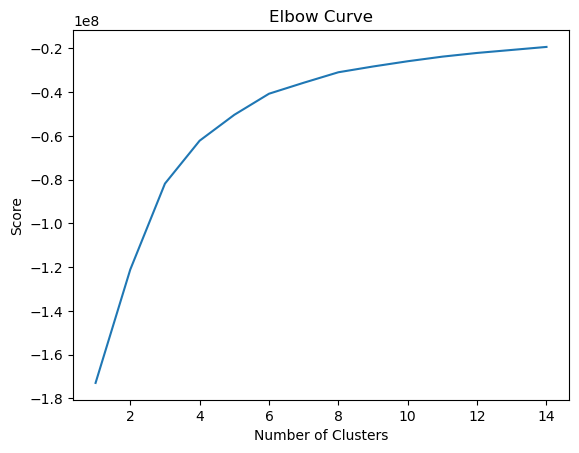

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a jump from at six (6) on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is six.

# 03. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(dfa)

C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [17]:
# Create a new column for the clusters
dfa['clusters'] = kmeans.fit_predict(dfa)

C:\Users\olufunsoo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olufunsoo\AppData\Local\Temp\ipykernel_12924\3579742105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['clusters'] = kmeans.fit_predict(dfa)


In [18]:
# Cheching output
dfa.head()

,Number of Certified Beds,Number of Residents in Certified Beds,Total Weighted Health Survey Score,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties,clusters
0,124,102,22.667,3.81554,0,1,1,2
1,183,168,48.667,3.28225,0,3,1,1
2,77,77,15.333,3.72376,0,0,0,0
3,107,96,25.333,5.53756,0,3,1,2
4,88,81,13.333,5.14766,0,0,0,2


In [19]:
dfa['clusters'].value_counts()

clusters
2    5914
0    5231
1    1933
5    1500
4     250
3     222
Name: count, dtype: int64

### Scatterplots

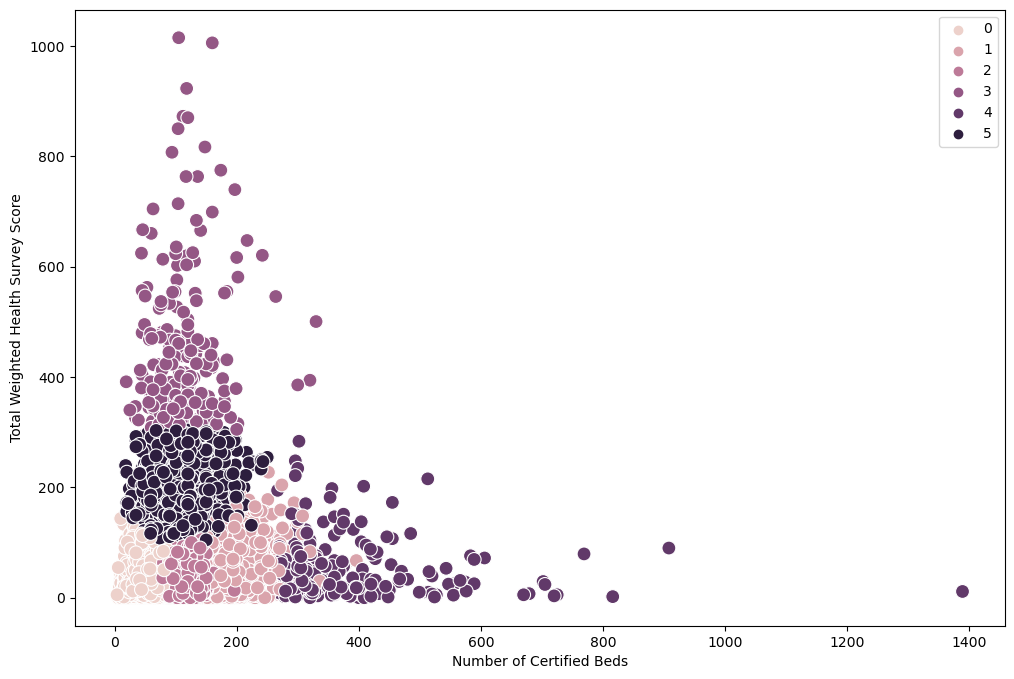

In [20]:
# Plot the clusters for the "Number of Certified Beds" and "Overall Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfa['Number of Certified Beds'], y=dfa['Total Weighted Health Survey Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Certified Beds') # Label x-axis.
plt.ylabel('Total Weighted Health Survey Score') # Label y-axis.
plt.show()

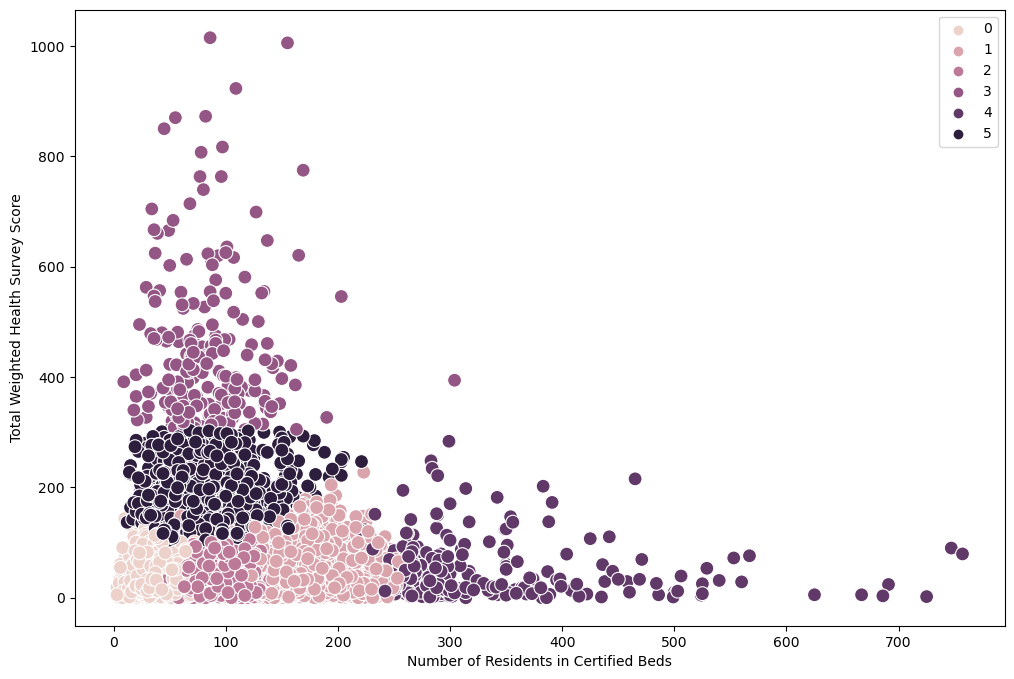

In [21]:
# Plot the clusters for the "Number of Residents in Certified Beds" and "Total Weighted Health Survey Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfa['Number of Residents in Certified Beds'], y=dfa['Total Weighted Health Survey Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Residents in Certified Beds') # Label x-axis.
plt.ylabel('Total Weighted Health Survey Score') # Label y-axis.
plt.show()

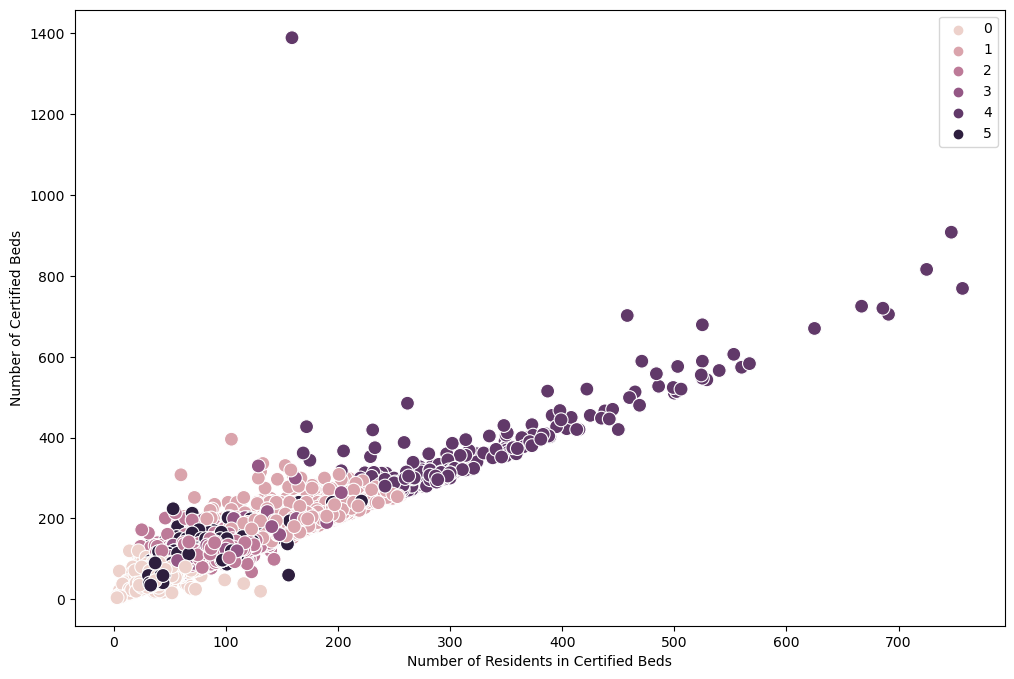

In [22]:
# Plot the clusters for the "Number of Residents in Certified Beds" and "Number of Certified Beds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfa['Number of Residents in Certified Beds'], y=dfa['Number of Certified Beds'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Residents in Certified Beds') # Label x-axis.
plt.ylabel('Number of Certified Beds') # Label y-axis.
plt.show()

### Conclusions

#### The first two scatterplots show that that the number of certified beds and the number of residents in the beds have an impact on the total weighted score. 
#### Cluster with nursing homes with certified beds less than 400 have high Total Weighted Score from about 300 to above 1000.
#### The clusters in the last scatter plot shows that there is a direct relationship between the number of certified beds and the number of residents in the beds. 

In [23]:
dfa.loc[dfa['clusters'] == 5, 'cluster'] = 'v.dark purple'
dfa.loc[dfa['clusters'] == 4, 'cluster'] = 'dark purple'
dfa.loc[dfa['clusters'] == 3, 'cluster'] = 'purple'
dfa.loc[dfa['clusters'] == 2, 'cluster'] = 'light purple'
dfa.loc[dfa['clusters'] == 1, 'cluster'] = 'v.light purple'
dfa.loc[dfa['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\olufunsoo\AppData\Local\Temp\ipykernel_12924\815939002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa.loc[dfa['clusters'] == 5, 'cluster'] = 'v.dark purple'


In [24]:
dfa.groupby('cluster').agg({'Number of Certified Beds':['mean', 'median'], 
                         'Number of Residents in Certified Beds':['mean', 'median'],
                          'Total Weighted Health Survey Score':['mean', 'median']})

Number of Certified Beds         \
                                   mean median   
cluster                                          
dark purple                  367.848000  320.0   
light purple                 114.191072  116.0   
pink                          56.998853   60.0   
purple                       112.851351  106.0   
v.dark purple                108.365333  108.0   
v.light purple               188.966891  180.0   

               Number of Residents in Certified Beds         \
                                                mean median   
cluster                                                       
dark purple                               326.320000  292.0   
light purple                               93.410382   93.0   
pink                                       45.557255   46.0   
purple                                     84.761261   81.0   
v.dark purple                              82.815333   81.0   
v.light purple                            159.482152  154.0   

               Total Weighted Health Survey Score            
                                             mean    median  
cluster                                                      
dark purple                             49.079964   32.6665  
light purple                            40.030636   35.3330  
pink                                    35.949695   30.6670  
purple                                 443.877676  398.2500  
v.dark purple                          165.172561  150.3330  
v.light purple                          47.990517   38.6670

#### The above table shows that the nursing home in the dark purple cluster have the best stat. With the highest means and medians for number of certified beds and number of residents in certified beds respectively, these nursing homes still have a relatively low Total Weighted Health Survey Score.

### Next Step

#### These results could be useful in studying further the indicators that impact the total weighted health survey alonside the number of certified beds or residents, as this shows that the total weighted health survey is a criterion for the rating of nursing homes.

In [25]:
# Export 'dfa'
dfa.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_With_Clusters.csv'))